In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# make columns lowercases for ease of use
data.columns = data.columns.str.lower()

In [ ]:
# Module-2 : Make a copy of the data for the visualisation


df_vis = data.copy()
df_vis.death_event = df_vis.death_event.map({0:'Alive',1:'Dead'})
df_vis.diabetes = df_vis.diabetes.map({0:'No',1:'Yes'})
df_vis.smoking = df_vis.smoking.map({0:'No',1:'Yes'})
df_vis.sex = df_vis.sex.map({0:'Female',1:'Male'})


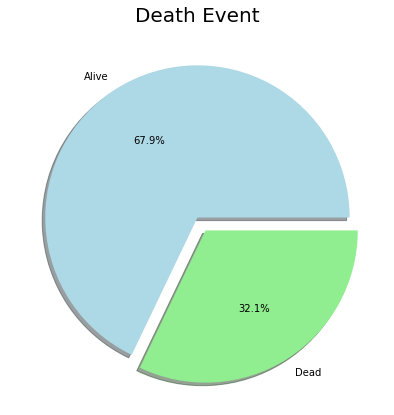

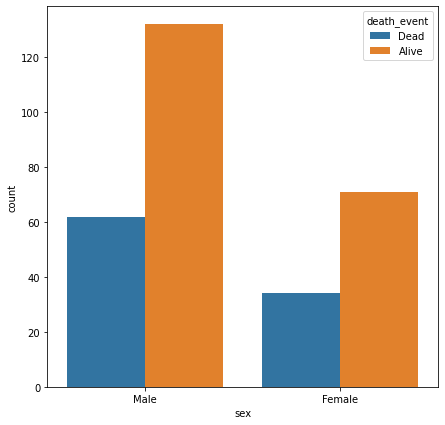

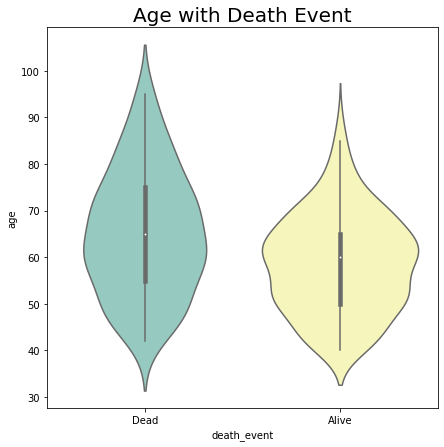

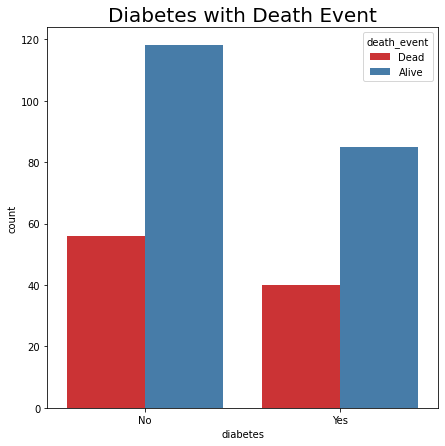

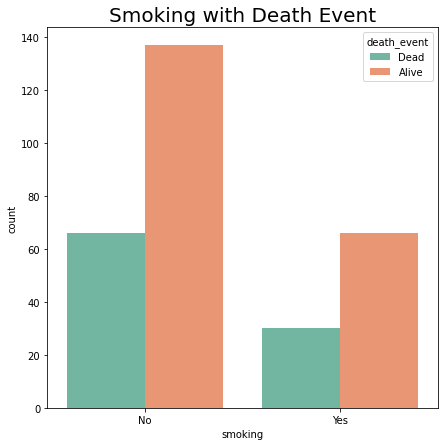

In [ ]:
# Module-3 :Distribution of Death by heart failure in dataset

plt.figure(figsize=(7,7))
plt.pie(data['death_event'].value_counts(),labels=['Alive','Dead'],autopct='%1.1f%%',shadow=True,explode=[0,0.1], colors = ['lightblue','lightgreen'])
plt.title('Death Event',fontsize=20)
plt.show()

# Sex distribution
df_vis['sex'].value_counts()

#Checking if there is relation between gender and death event
plt.figure(figsize=(7,7))
sns.countplot(x='sex',hue='death_event',data=df_vis)


#Checking if there is there a relationship between age and heart failure
plt.figure(figsize=(7,7))
sns.violinplot(x='death_event',y='age',data=df_vis, palette='Set3')
plt.title('Age with Death Event',fontsize=20)
plt.show()
# output - The older the person, the more likely he is to die from heart failure.



# Checking if diabetes can be a cause of heart failure
plt.figure(figsize=(7,7))
sns.countplot(x='diabetes',hue='death_event',data=df_vis, palette='Set1')
plt.title('Diabetes with Death Event',fontsize=20)
plt.show()
# result - There is no significant difference between the number of
#  people with diabetes and without diabetes who died from heart failure.



# Checking if smoking can be a cause of heart failure
plt.figure(figsize=(7,7))
sns.countplot(x='smoking',hue='death_event',data=df_vis, palette='Set2')
plt.title('Smoking with Death Event',fontsize=20)
plt.show()
# output - People who smoke are more likely to die from heart failure.




In [ ]:
import plotly.express as px
fig = px.violin(df_vis, y="creatinine_phosphokinase", x="death_event", color="death_event", box=True, points="all", hover_data=df_vis.columns)
fig.show()



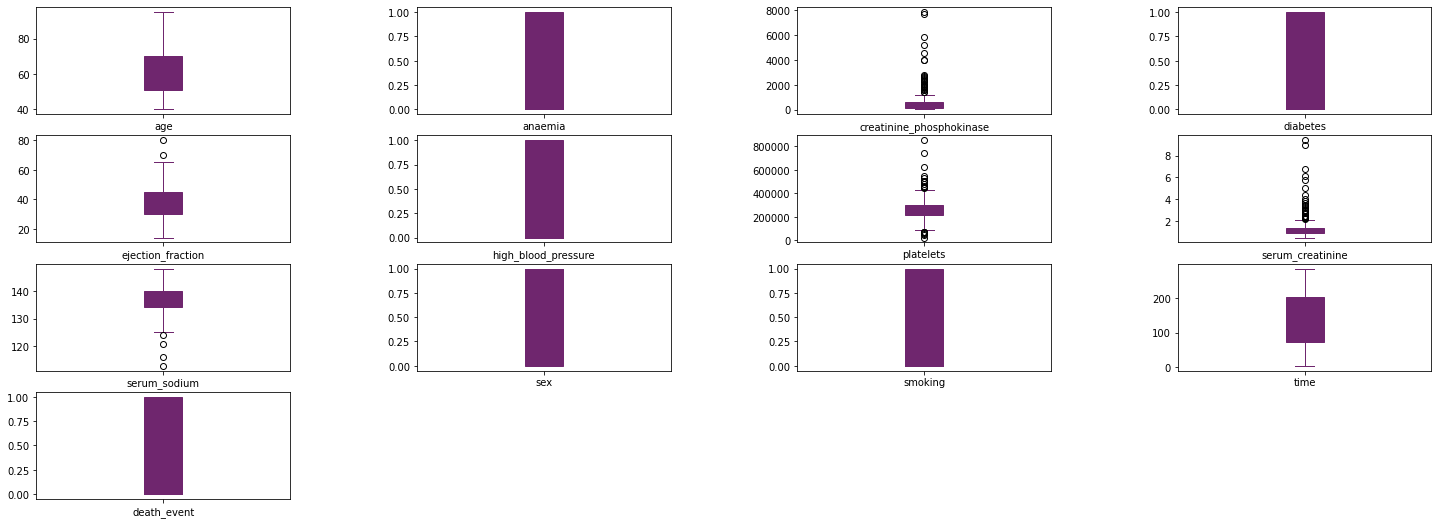

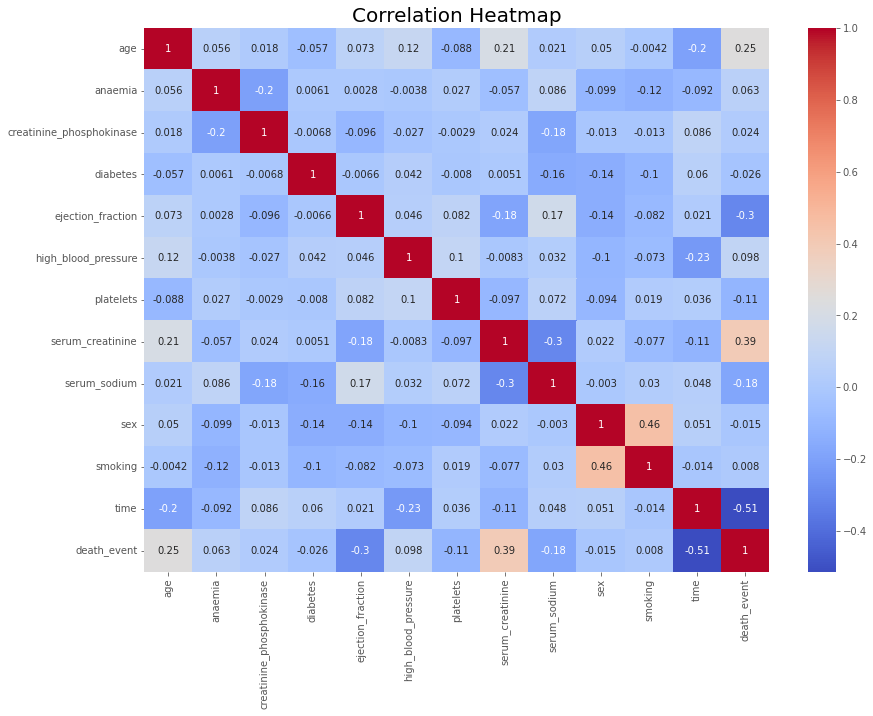

In [ ]:
# Module 4 - Data preprocessing

#Check for missing values
data.isnull().sum()
# Checking for outliers
nums = data.select_dtypes(exclude=["object"])
nums.plot(subplots = True , kind ='box', layout = (15,4), figsize = (25,35), patch_artist= True ,color = "#6F266E")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()

#Deletion of outliers
data = data.drop(data[data['platelets']>420000].index)
data = data.drop(data[data['serum_creatinine']>2.5].index)
data = data.drop(data[data['creatinine_phosphokinase']>1500].index)


# heatmap for correlation
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap',fontsize=20)
plt.show()



[0.09254312 0.0244062  0.07074374 0.03218036 0.12768341 0.02516456
 0.0737816  0.14057331 0.0820037  0.02451522 0.02742557 0.27897921]


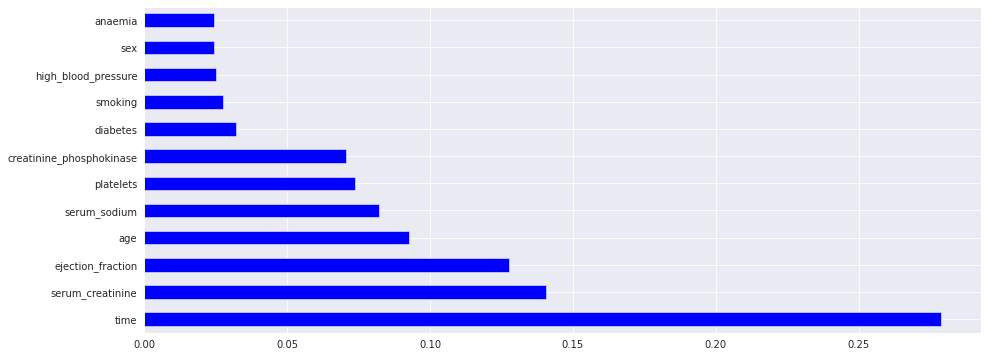

serum_sodium has been removed
age has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,sex,smoking,time,death_event
0,0,582,0,20,1,265000.0,1.9,1,0,4,1
2,0,146,0,20,0,162000.0,1.3,1,1,7,1
3,1,111,0,20,0,210000.0,1.9,1,0,7,1
5,1,47,0,40,1,204000.0,2.1,1,1,8,1
6,1,246,0,15,0,127000.0,1.2,1,0,10,1


In [ ]:
# Module 5: Feature Selection

plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
x = data.iloc[:, :-1]
y = data.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh',color='blue')
plt.show()

# for understanding purpose - multicollinearity is a phenomenon in which one predictor variable in a 
# multiple regression model can be linearly predicted from the others

#Check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) 
for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) 
for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF


# Treatment of multicolinearity
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>13:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data


for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

In [ ]:
#Calculating VIF for remaining columns
# Understanding - A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

X = vif_data.drop('death_event',axis=1)
y = vif_data['death_event']


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)


In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sm = scaler.fit_transform(X_sm)

In [ ]:
# Module 6: Model comparison

#Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)




In [ ]:
# ANN
from gc import callbacks
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
     min_delta=0.001, 
    patience=20, 
    restore_best_weights=True
)
model = Sequential()

In [ ]:
# input layer
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
#hidden layer 1
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
#hidden layer 2
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
#hidden layer 3
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.01))
# output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) 



# Understanding - Relu activation function transforms the summed weighted input from the node 
# into the activation of the node or output for that input.

#Activation function used = Relu

# sigmoid function is used for output layer which gives a binary result


In [ ]:
# Understanding - Optimizers are algorithms or methods used to change the attributes of the neural network such as weights 
# and learning rate to reduce the losses
# Understanding - Adam is a replacement optimization algorithm for stochastic gradient descent for 
# training deep learning models.


# Compiling the ANN


# Adam Optimizer is used in our model
# loss function = binary cross entropy


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# 

In [ ]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 200,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/200
7/7 [==============================] - 1s 39ms/step - loss: 0.6932 - accuracy: 0.4601 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5117 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5117 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5117 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5117 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5117 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5117 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/200
7/7 [=========

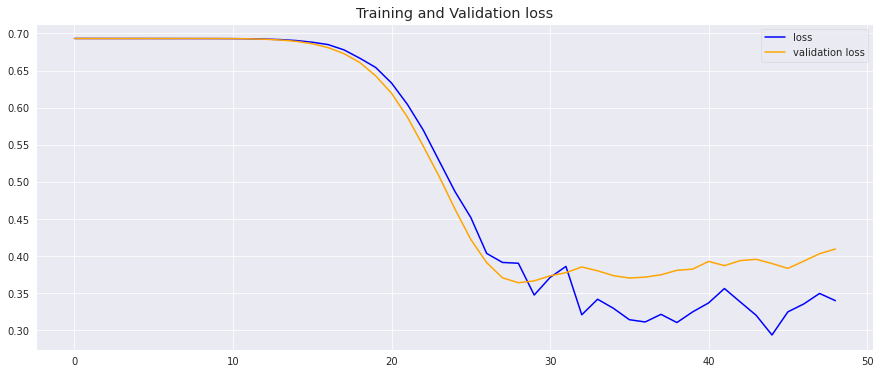

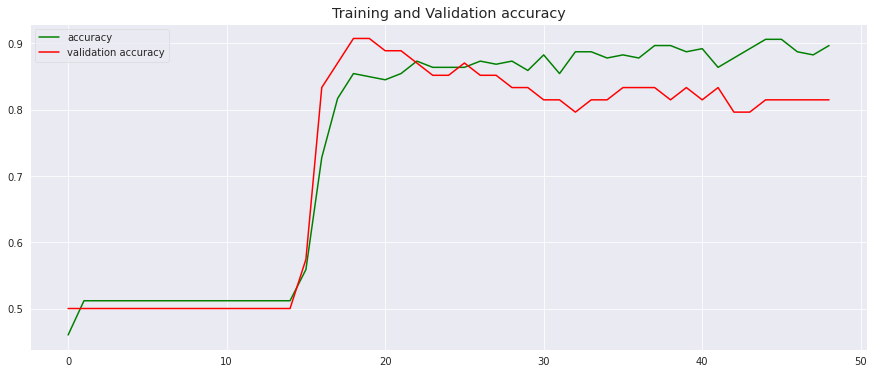

3/3 [==============================] - 0s 5ms/step


array([[ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [ ]:
# plot the loss and accuracy 
plt.title('Training and Validation loss')
plt.plot(history.history['loss'], label='loss', color='blue')
plt.plot(history.history['val_loss'], label='validation loss', color='orange')
plt.legend()
plt.show()

plt.title('Training and Validation accuracy')
plt.plot(history.history['accuracy'], label='accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='validation accuracy', color='red')
plt.legend()
plt.show()


# predict the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred


In [ ]:
# module7 : Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
model.summary()

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        31
           1       0.78      0.78      0.78        36

    accuracy                           0.76        67
   macro avg       0.76      0.76      0.76        67
weighted avg       0.76      0.76      0.76        67

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                           

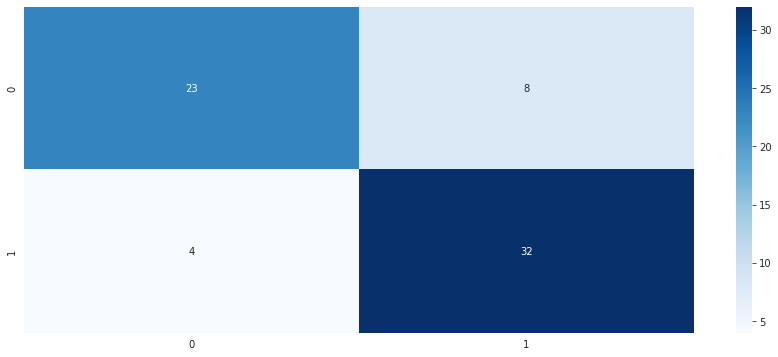

In [ ]:
# plot confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()